In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from typing import List
from random import randint

In [16]:
N = 100                 # size of array
SIZE = N * N
SWAPS = pow(10, 6)      # amount of swaps cells

HAPPY_RATION = 4        # number of neighbors to be happy
OCCUPIED_RATION = 0.45  # occupied in percentages (separate for BLUE & RED)
VACANT_RATION = 0.1     # vacant places 

SCATTER_SIZE = N/10 * 2 # size of scatter

BLUE, RED, WHITE = 0, 1, -1 # value of colors
VACANT = WHITE


In [17]:
def pltcolor(arr: List) -> List:
    """Return list of point colors"""
    colors_set = {BLUE: 'blue', RED: 'red', VACANT: 'white'}
    colors = list()
    for item in arr:
        colors.append(colors_set.get(item))
    return colors

def get_same_neighbors(matrix: np.ndarray, y: int, x: int, cell_value: int) -> List:
    """Return number of same neighbors around cell"""
    neighbors = list()
    if y == 0:
        if x == 0:
            neighbors.extend([matrix[y][x+1], matrix[y+1][x], matrix[y+1][x+1]])
        elif x == N-1:
            neighbors.extend([matrix[y][x-1], matrix[y+1][x], matrix[y+1][x-1]])
        else:
            neighbors.extend([matrix[y+1][x-1], matrix[y+1][x], matrix[y+1][x+1],
                                matrix[y][x-1], matrix[y][x+1]])
    elif y == N-1:
        if x == 0:
            neighbors.extend([matrix[y][x+1], matrix[y-1][x], matrix[y-1][x+1]])
        elif x == N-1:
            neighbors.extend([matrix[y][x-1], matrix[y-1][x], matrix[y-1][x-1]])
        else:
            neighbors.extend([matrix[y-1][x-1], matrix[y-1][x], matrix[y-1][x+1],
                                matrix[y][x-1], matrix[y][x+1]])
    else:
        if x == 0:
            neighbors.extend([matrix[y+1][x], matrix[y+1][x+1], matrix[y][x+1],
                                matrix[y-1][x-1], matrix[y-1][x]])
        if x == N-1:
            neighbors.extend([matrix[y+1][x], matrix[y+1][x-1], matrix[y][x-1],
                                matrix[y-1][x-1], matrix[y-1][x]])
        else:
            neighbors.extend([matrix[y+1][x+1], matrix[y+1][x], matrix[y+1][x-1],
                                matrix[y-1][x+1], matrix[y-1][x], matrix[y-1][x-1],
                                matrix[y][x+1], matrix[y][x-1]])
    return neighbors.count(cell_value)

In [18]:
array = np.zeros(SIZE, dtype=np.int8)
# Brilliant way to fill array
array[:int(SIZE*OCCUPIED_RATION)] = 1
array[-int(SIZE*VACANT_RATION):] = -1
np.random.shuffle(array)

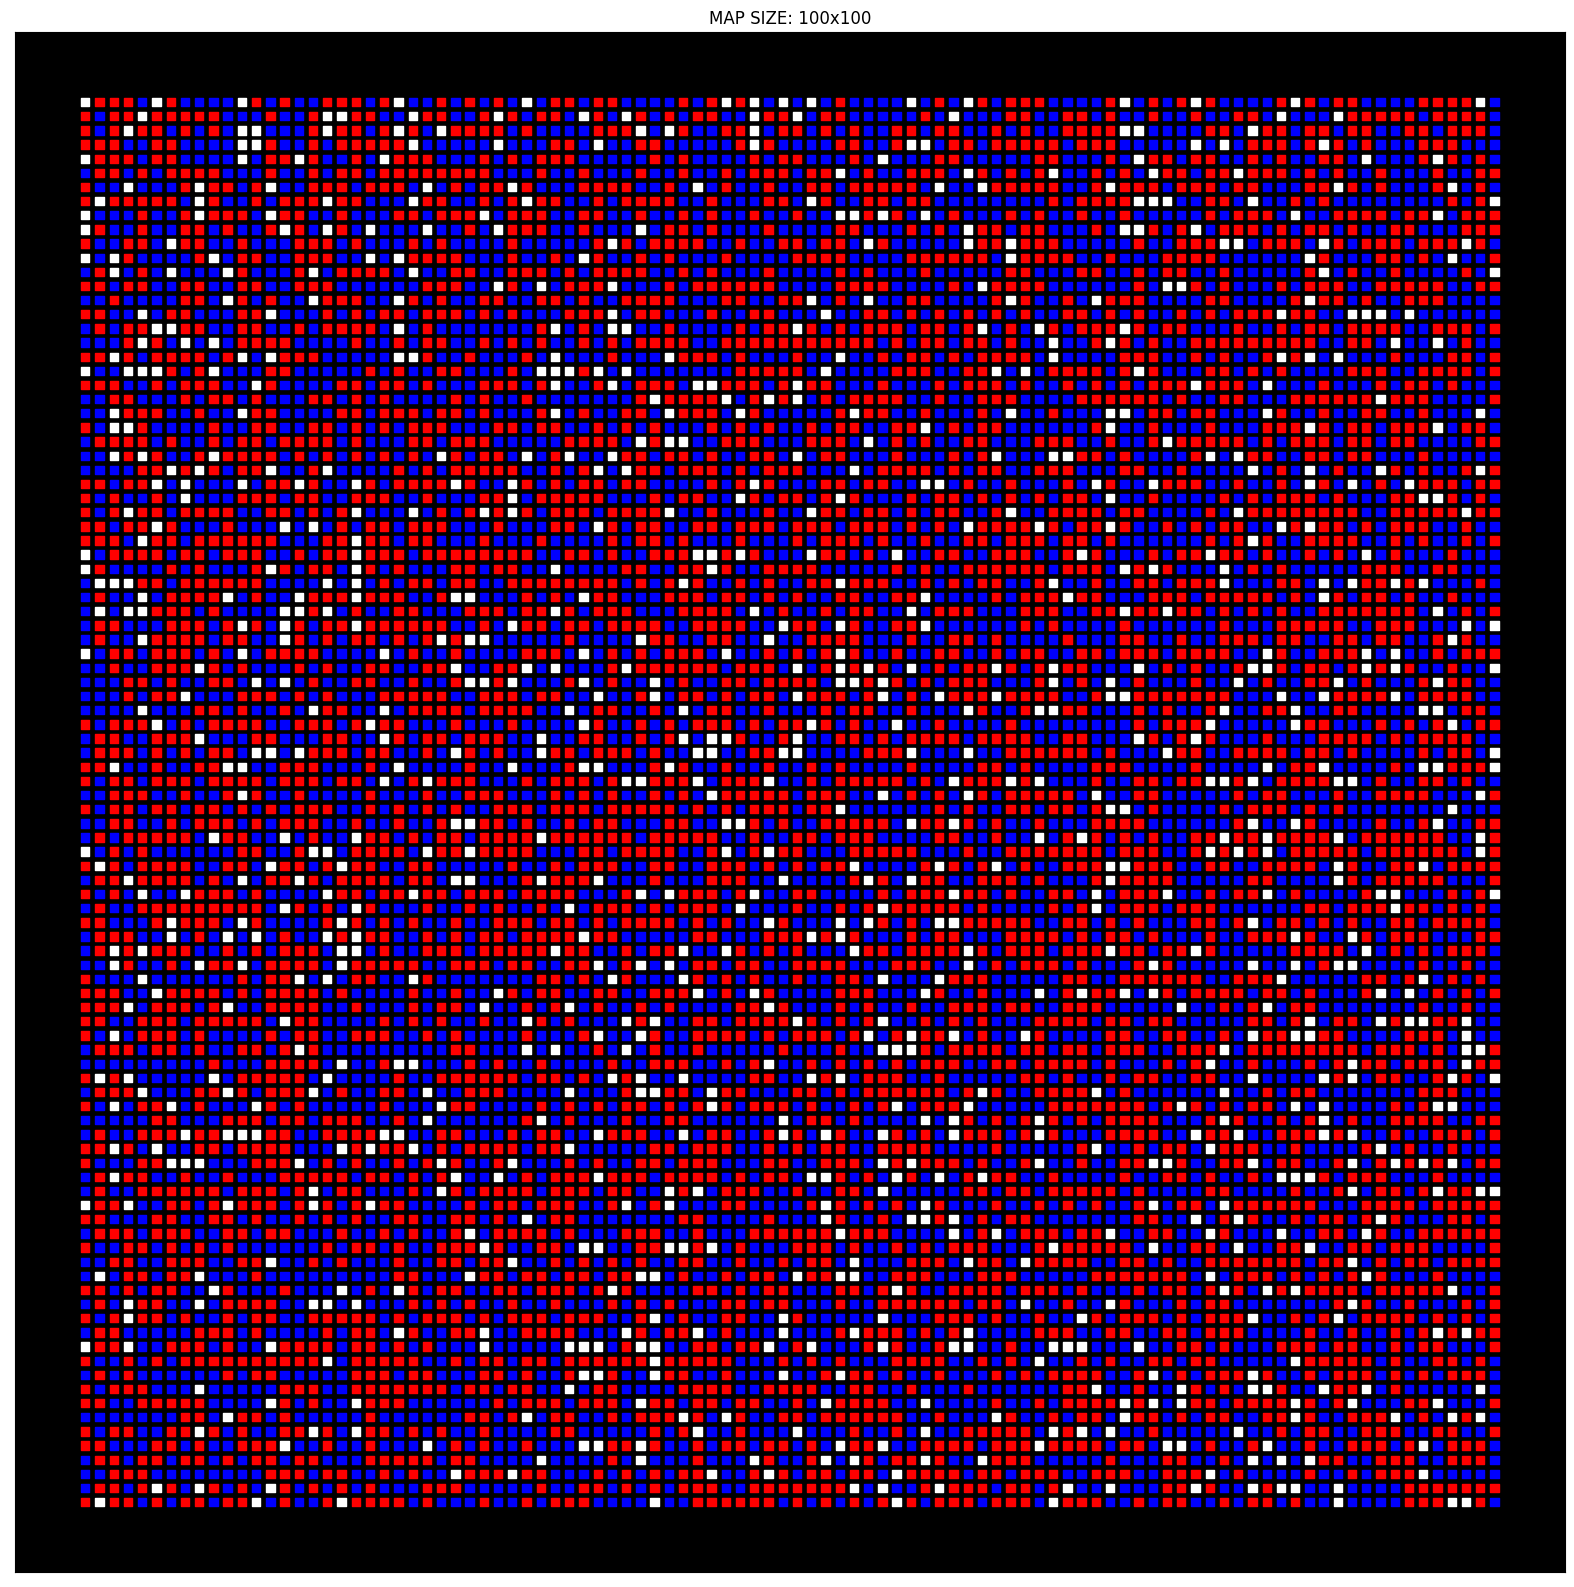

In [19]:
ox = [i for i in range(N)] * N
oy = [i//N for i in range(N*N)]

fig, ax = plt.subplots()

ax.set_facecolor('black')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title(f'MAP SIZE: {N}x{N}')
ax.scatter(x=ox, y=oy, marker='s', c=pltcolor(arr=array))

fig.set_figwidth(SCATTER_SIZE) 
fig.set_figheight(SCATTER_SIZE)

plt.show()

In [20]:
matrix = np.reshape(array.copy(), (N, N))
vacant = [[id//N, id%N] for id, value in enumerate(array) if value == VACANT] # get list of vacant places
i = 0
while i < SWAPS:
    y = randint(0, N-1)
    x = randint(0, N-1)
    if matrix[y][x] != VACANT: # Python way int(matrix[y][x]) is not VACANT:
        i+=1
        same_neighbors = get_same_neighbors(matrix=matrix, y=y, x=x, cell_value=matrix[y][x])

        if same_neighbors < HAPPY_RATION:
            index = randint(0, len(vacant)-1)
            vacant_y = vacant[index][0]
            vacant_x = vacant[index][1]

            array[vacant_y*N + vacant_x] = matrix[y][x]
            array[y*N + x] = VACANT
            
            matrix[vacant_y][vacant_x] = matrix[y][x]
            matrix[y][x] = VACANT
            
            vacant.pop(index)
            vacant.append([y, x])

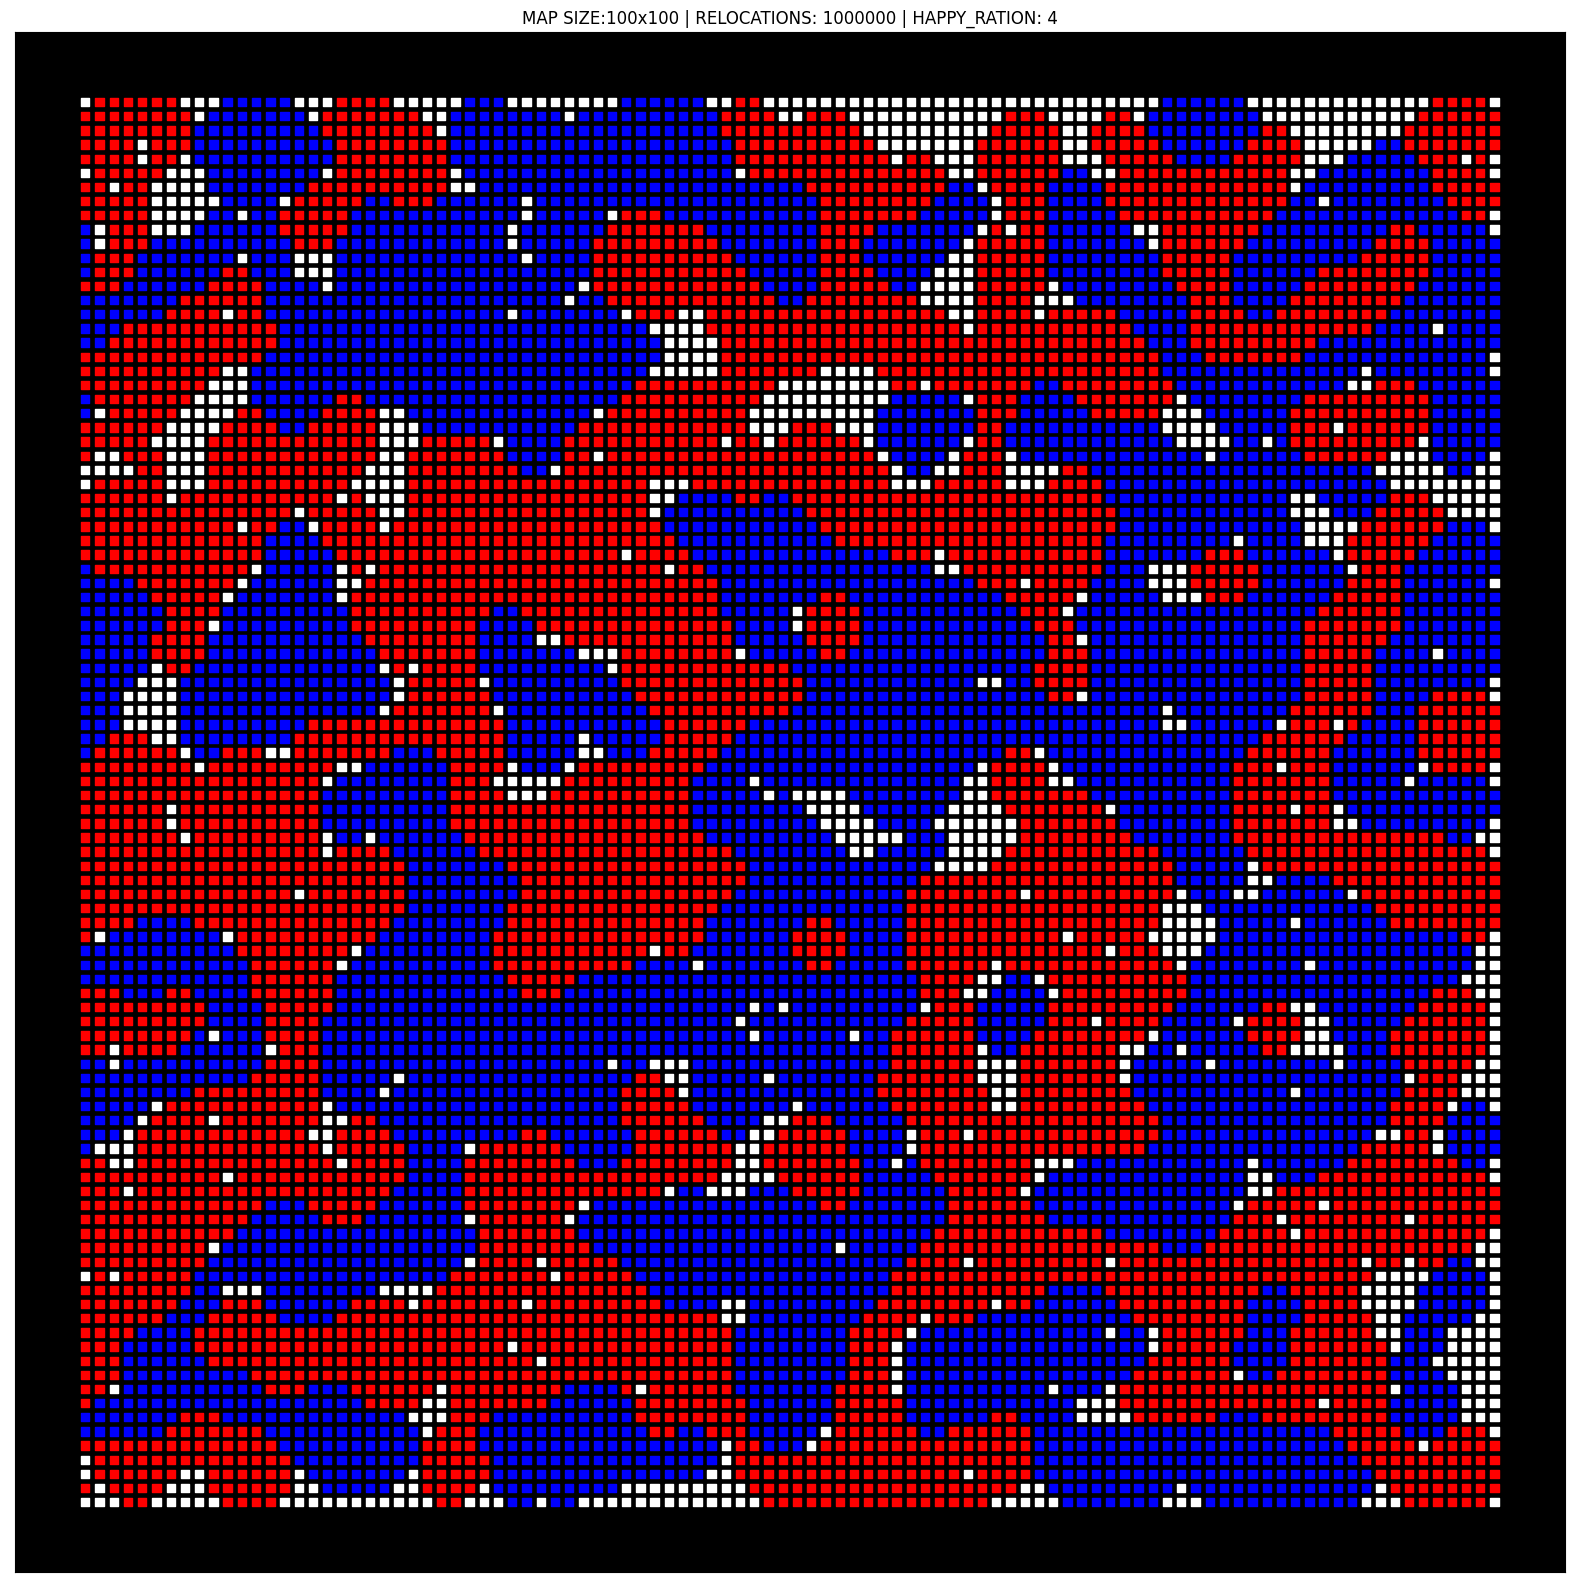

In [21]:
fig, ax = plt.subplots()

ax.set_facecolor('black')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.scatter(x=ox, y=oy, marker='s', c=pltcolor(arr=array))
ax.set_title(f'MAP SIZE:{N}x{N} | RELOCATIONS: {SWAPS} | HAPPY_RATION: {HAPPY_RATION}')

fig.set_figwidth(SCATTER_SIZE) 
fig.set_figheight(SCATTER_SIZE)

plt.show()